## Importing Libraries

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

## Importing CSV file

In [2]:
att_df=pd.read_csv('HR_Employee_Attrition_Data.csv')
att_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               3   
3                 3          4  Life Sciences              1               4   
4                 2          1        Medical              1               5   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
att_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [4]:
att_df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  2940.000000  2940.000000       2940.000000  2940.000000         2940.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.133819   403.440447          8.105485     1.023991            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     2940.000000              2940.000000  2940.000000     2940.000000   
mean      1470.500000                 2.721769    65.891156        2.729932   
std        848.849221                 1.092896    20.325969        0.711440   
min          1.000000                 1.000000    30.000000        1.000000   
25%        735.750000                 2.000000    48.000000        2.000000   
50%       1470.500000                 3.000000    66.000000        3.000000   
75%       2205.250000                 4.000000    84.000000        3.000000   
max       2940.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  2940.000000  ...               2940.000000         2940.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106752  ...                  1.081025            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       2940.000000        2940.000000            2940.000000   
mean           0.793878          11.279592               2.799320   
std            0.851932           7.779458               1.289051   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      2940.000000     2940.000000         2940.000000   
mean          2.761224        7.008163            4.229252   
std           0.706356        6.125483            3.622521   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              2940.000000           2940.000000  
mean                  2.187755              4.123129  
std                   3.221882              3.567529  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [5]:
att_df['Attrition'].value_counts(normalize=True) * 100 #Imbalanced Data

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

## List different categories in our dataset

In [6]:
print(att_df.Department.unique())
print(att_df.BusinessTravel.unique())
print(att_df.EducationField.unique())
print(att_df.Gender.unique())
print(att_df.JobRole.unique())
print(att_df.MaritalStatus.unique())
print(att_df.Attrition.unique())

['Sales' 'Research & Development' 'Human Resources']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']
['Yes' 'No']


## Visulizations

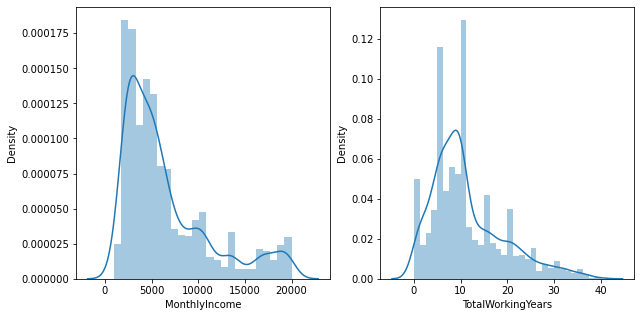

<Figure size 432x288 with 0 Axes>

In [7]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(att_df['MonthlyIncome'], ax = ax[0])
sns.distplot(att_df['TotalWorkingYears'], ax = ax[1])
plt.show()
plt.savefig('distplot.jpg')

In [8]:
att_df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              2940
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [9]:
gen = att_df.groupby(['Attrition', 'Gender']).size().reset_index().pivot(columns = 'Attrition', index = 'Gender', values = 0)
dep = att_df.groupby(['Attrition', 'Department']).size().reset_index().pivot(columns = 'Attrition', index = 'Department', values = 0)
bus = att_df.groupby(['Attrition', 'BusinessTravel']).size().reset_index().pivot(columns = 'Attrition', index = 'BusinessTravel', values = 0)
edu = att_df.groupby(['Attrition', 'EducationField']).size().reset_index().pivot(columns = 'Attrition', index = 'EducationField', values = 0)
job = att_df.groupby(['Attrition', 'JobRole']).size().reset_index().pivot(columns = 'Attrition', index = 'JobRole', values = 0)
mar = att_df.groupby(['Attrition', 'MaritalStatus']).size().reset_index().pivot(columns = 'Attrition', index = 'MaritalStatus', values = 0)
env = att_df.groupby(['Attrition', 'EnvironmentSatisfaction']).size().reset_index().pivot(columns = 'Attrition', index = 'EnvironmentSatisfaction', values = 0)
inv = att_df.groupby(['Attrition', 'JobInvolvement']).size().reset_index().pivot(columns = 'Attrition', index = 'JobInvolvement', values = 0)
bln = att_df.groupby(['Attrition', 'WorkLifeBalance']).size().reset_index().pivot(columns = 'Attrition', index = 'WorkLifeBalance', values = 0)
stk = att_df.groupby(['Attrition', 'StockOptionLevel']).size().reset_index().pivot(columns = 'Attrition', index = 'StockOptionLevel', values = 0)

<AxesSubplot:xlabel='StockOptionLevel'>

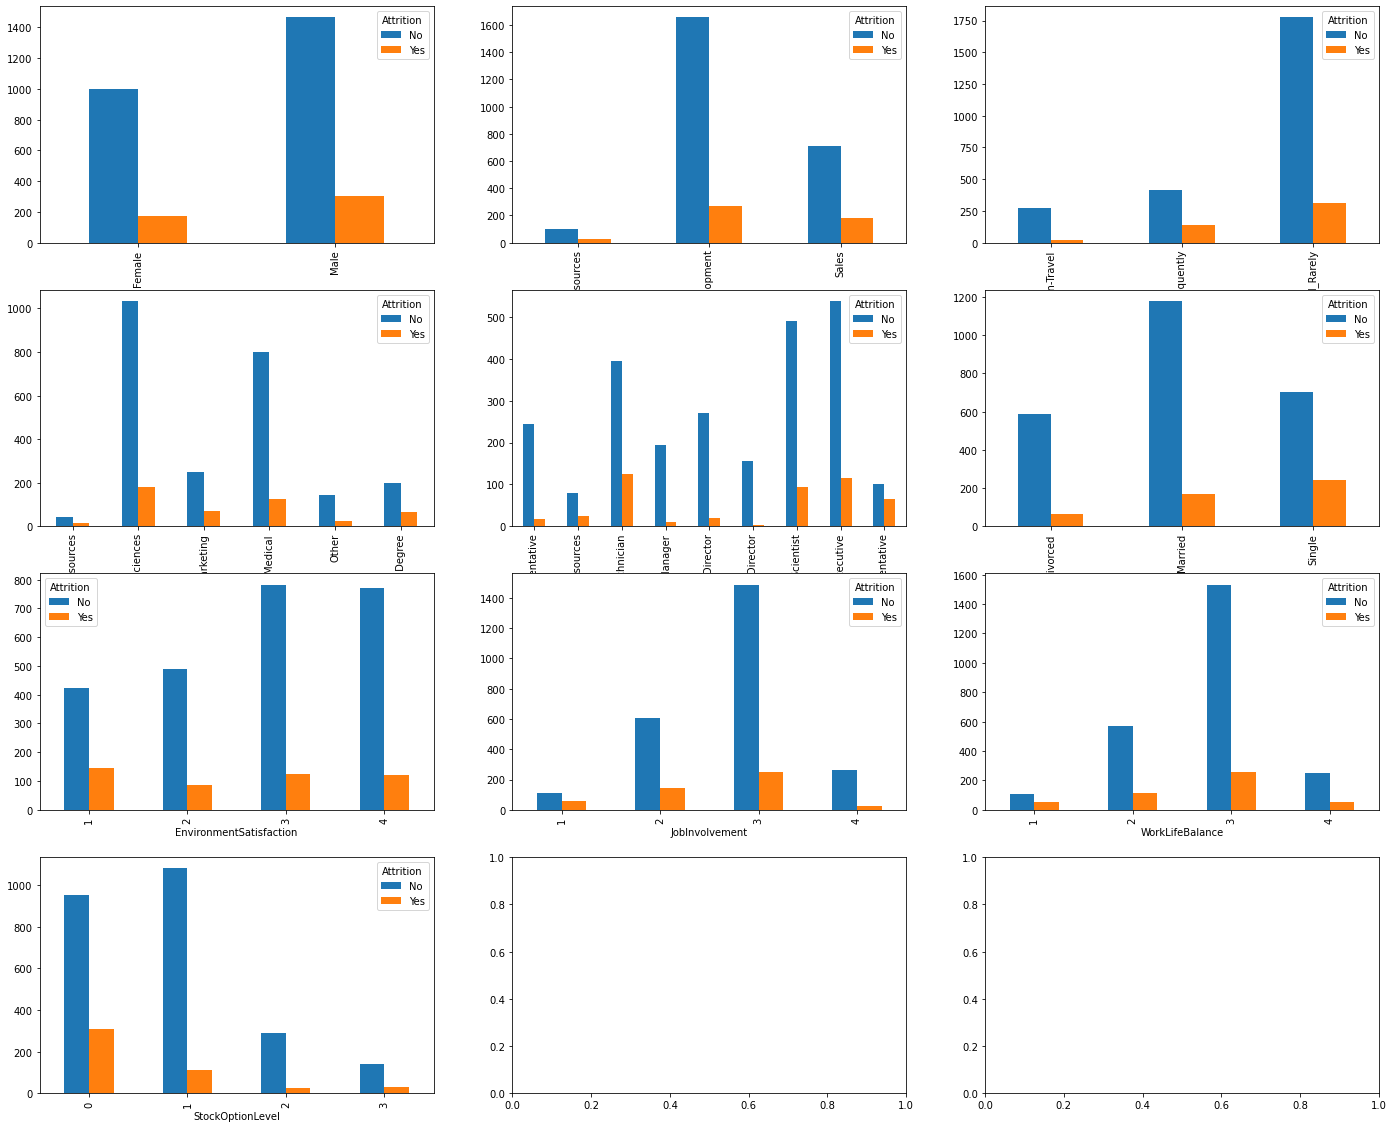

In [10]:
fig,ax=plt.subplots(4,3,figsize=(24,20))
gen.plot(kind='bar',ax=ax[0,0])
dep.plot(kind='bar',ax=ax[0,1])
bus.plot(kind='bar',ax=ax[0,2])
edu.plot(kind='bar',ax=ax[1,0])
job.plot(kind='bar',ax=ax[1,1])
mar.plot(kind='bar',ax=ax[1,2])
env.plot(kind='bar',ax=ax[2,0])
inv.plot(kind='bar',ax=ax[2,1])
bln.plot(kind='bar',ax=ax[2,2])
stk.plot(kind='bar',ax=ax[3,0])

# Data Cleaning

##  Null value check

In [11]:
att_df.isna().sum() #no null values present in any column

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Unique column deletion

In [12]:
att_df.nunique()#here column 'EmployeeCount','Over18','StandardHours' contains single unique which is of no use
                    #for our model, hence dropping these columns.

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              2940
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [13]:
emp_df=att_df.drop(columns=['EmployeeCount','Over18','StandardHours','EmployeeNumber'],axis=1)

In [14]:
att_df.shape

(2940, 35)

In [15]:
emp_df.shape

(2940, 31)

## Outliers check

In [16]:
em_df=emp_df.select_dtypes('int64')

In [17]:
a=int(len(em_df.columns)/5)

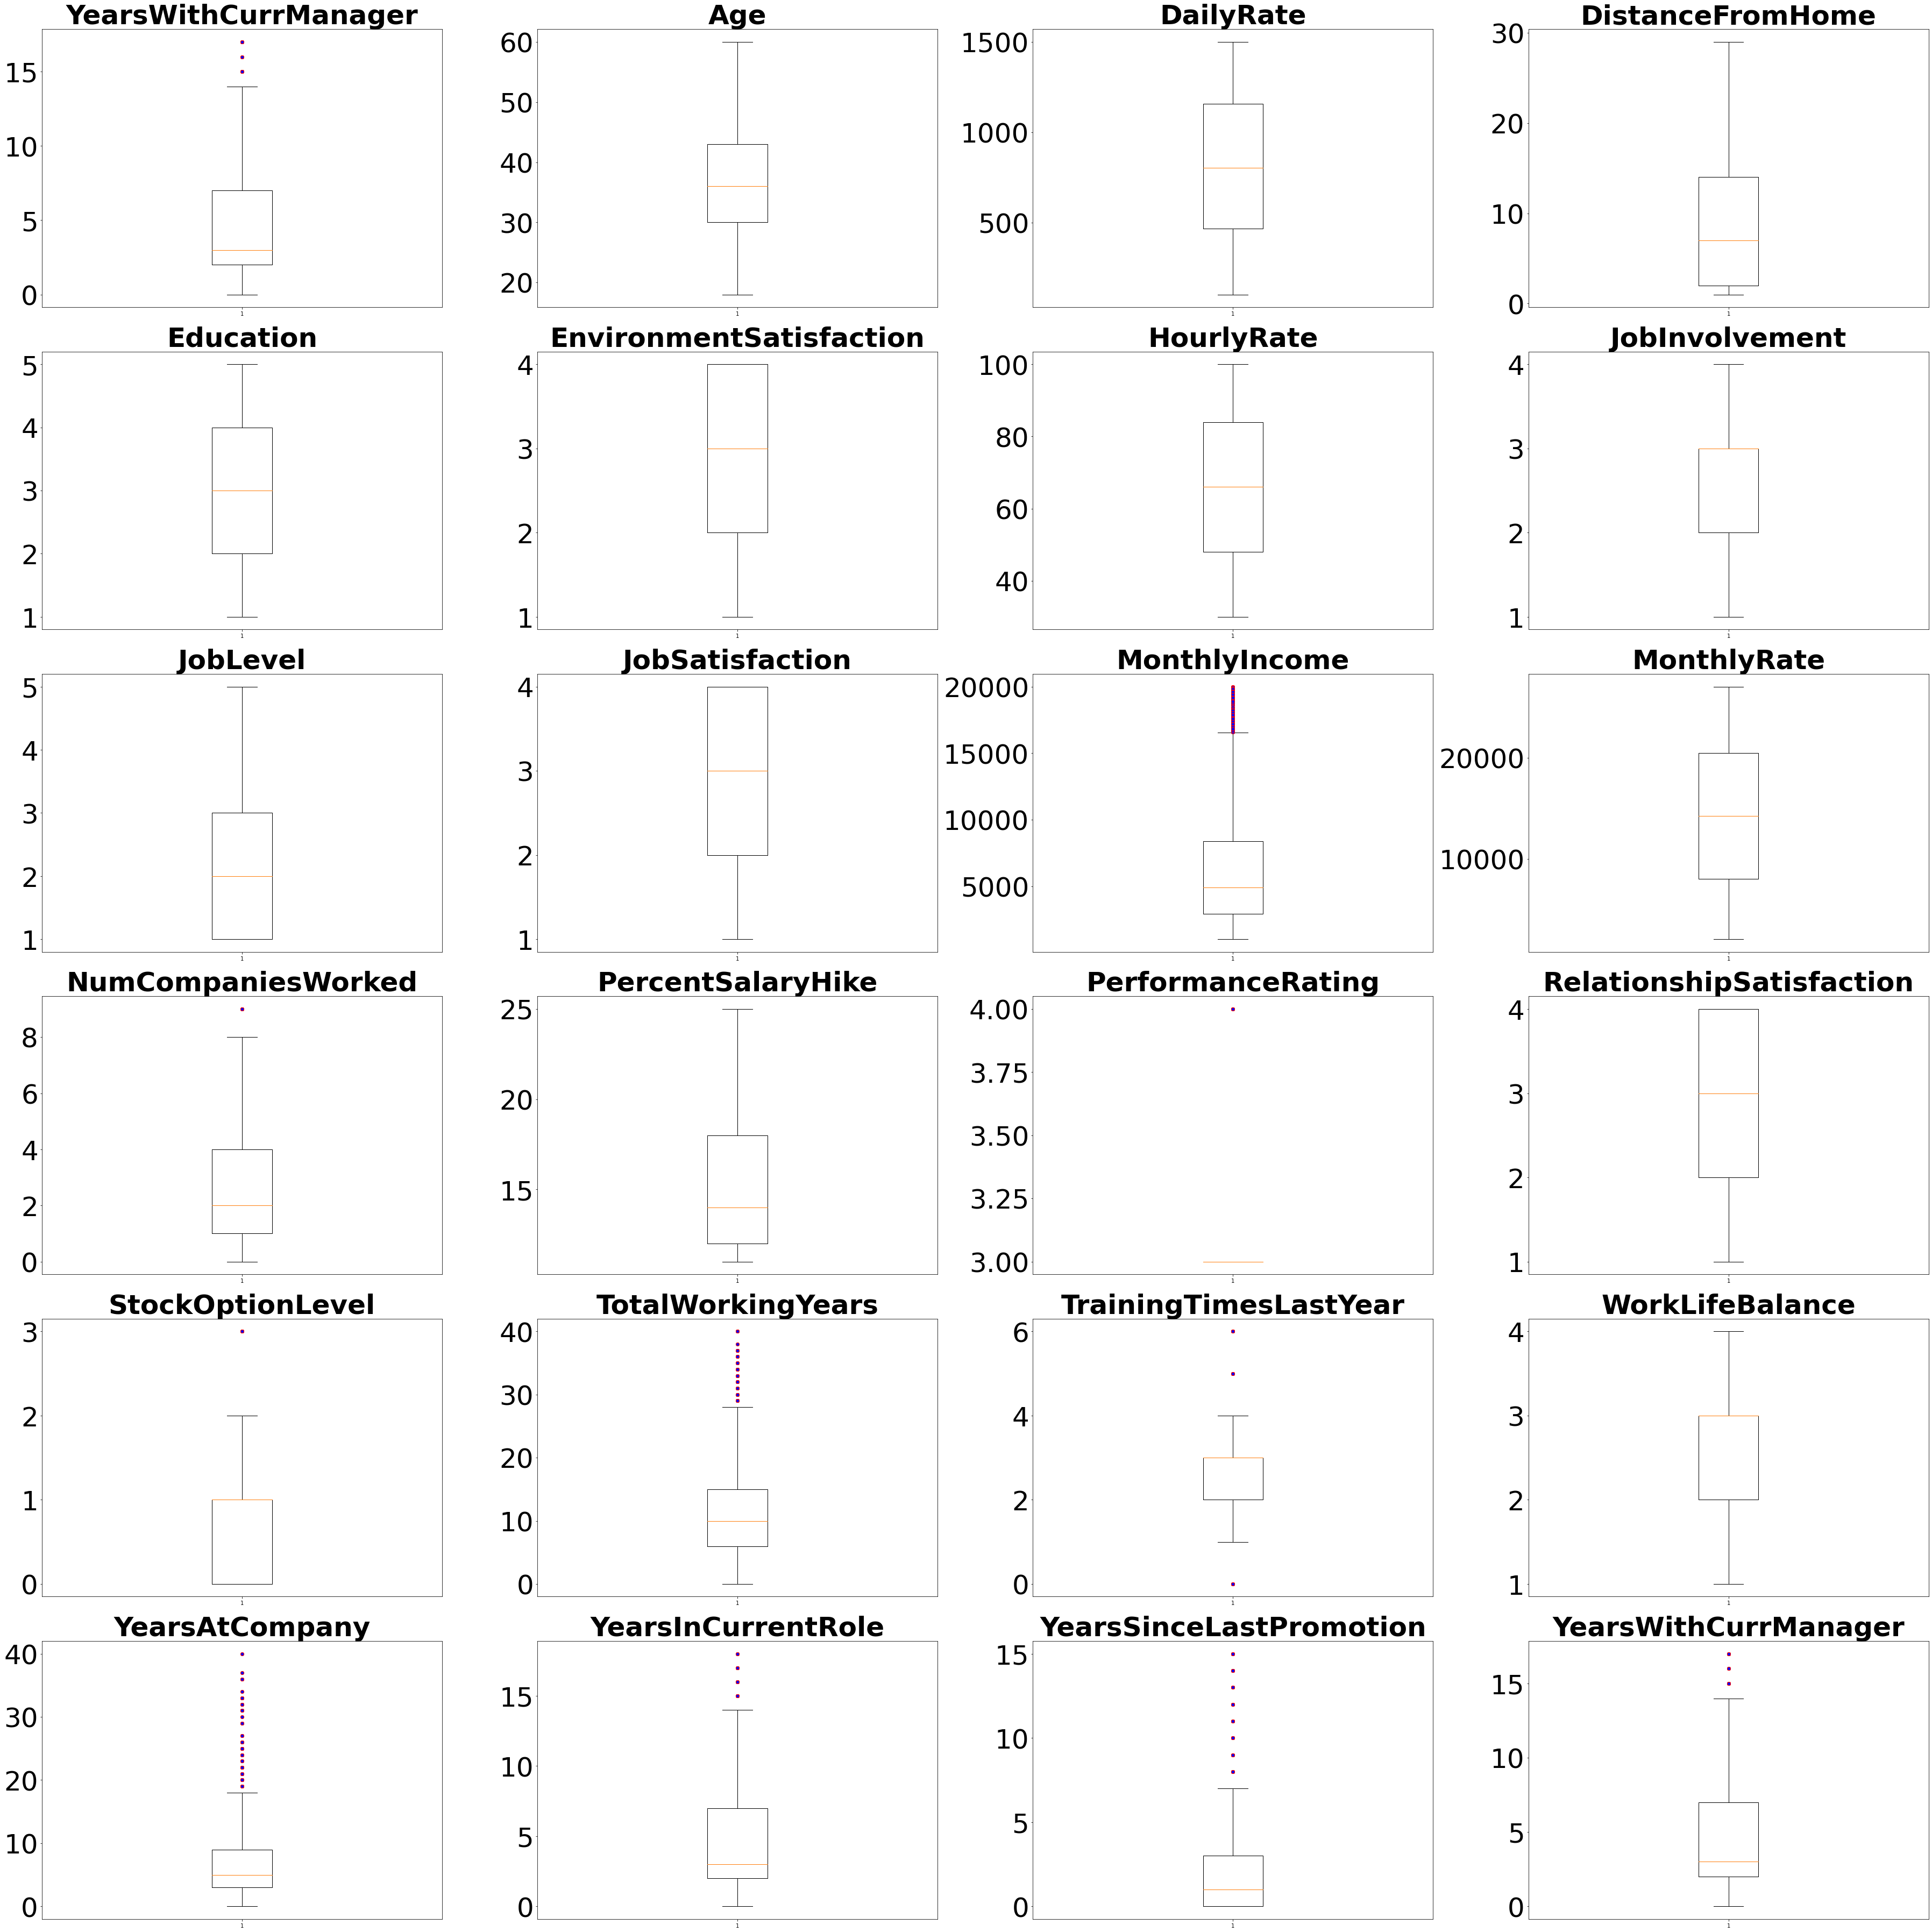

In [18]:
blue_circle = dict(markerfacecolor='blue', marker='o', markeredgecolor='red')

fig, axs = plt.subplots(6, a, figsize=(50,50))

for i, ax in enumerate(axs.flat):
    ax.boxplot(em_df.iloc[:,i-1], flierprops=blue_circle)
    ax.set_title(em_df.columns[i-1], fontsize=50, fontweight='bold')
    ax.tick_params(axis='y', labelsize=50)
    
plt.tight_layout()
plt.savefig('boxplot_with_outliers.jpg')

## Capping of outliers

In [19]:
new_emp_df=emp_df.copy()

In [20]:
lst=[]
lst.append(new_emp_df.select_dtypes('int64').columns)

In [21]:
def iqr_capping(df,col,factor):
    for i in col:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+(factor*iqr)
        lower=q1-(factor*iqr)
        df[i]=np.where(df[i]>upper,upper,np.where(df[i]<lower,lower,df[i]))
    return

In [22]:
iqr_capping(new_emp_df,lst,1.5)

In [23]:
new_em_df=new_emp_df.select_dtypes('float64')

In [24]:
b=int(len(new_em_df.columns)/5)

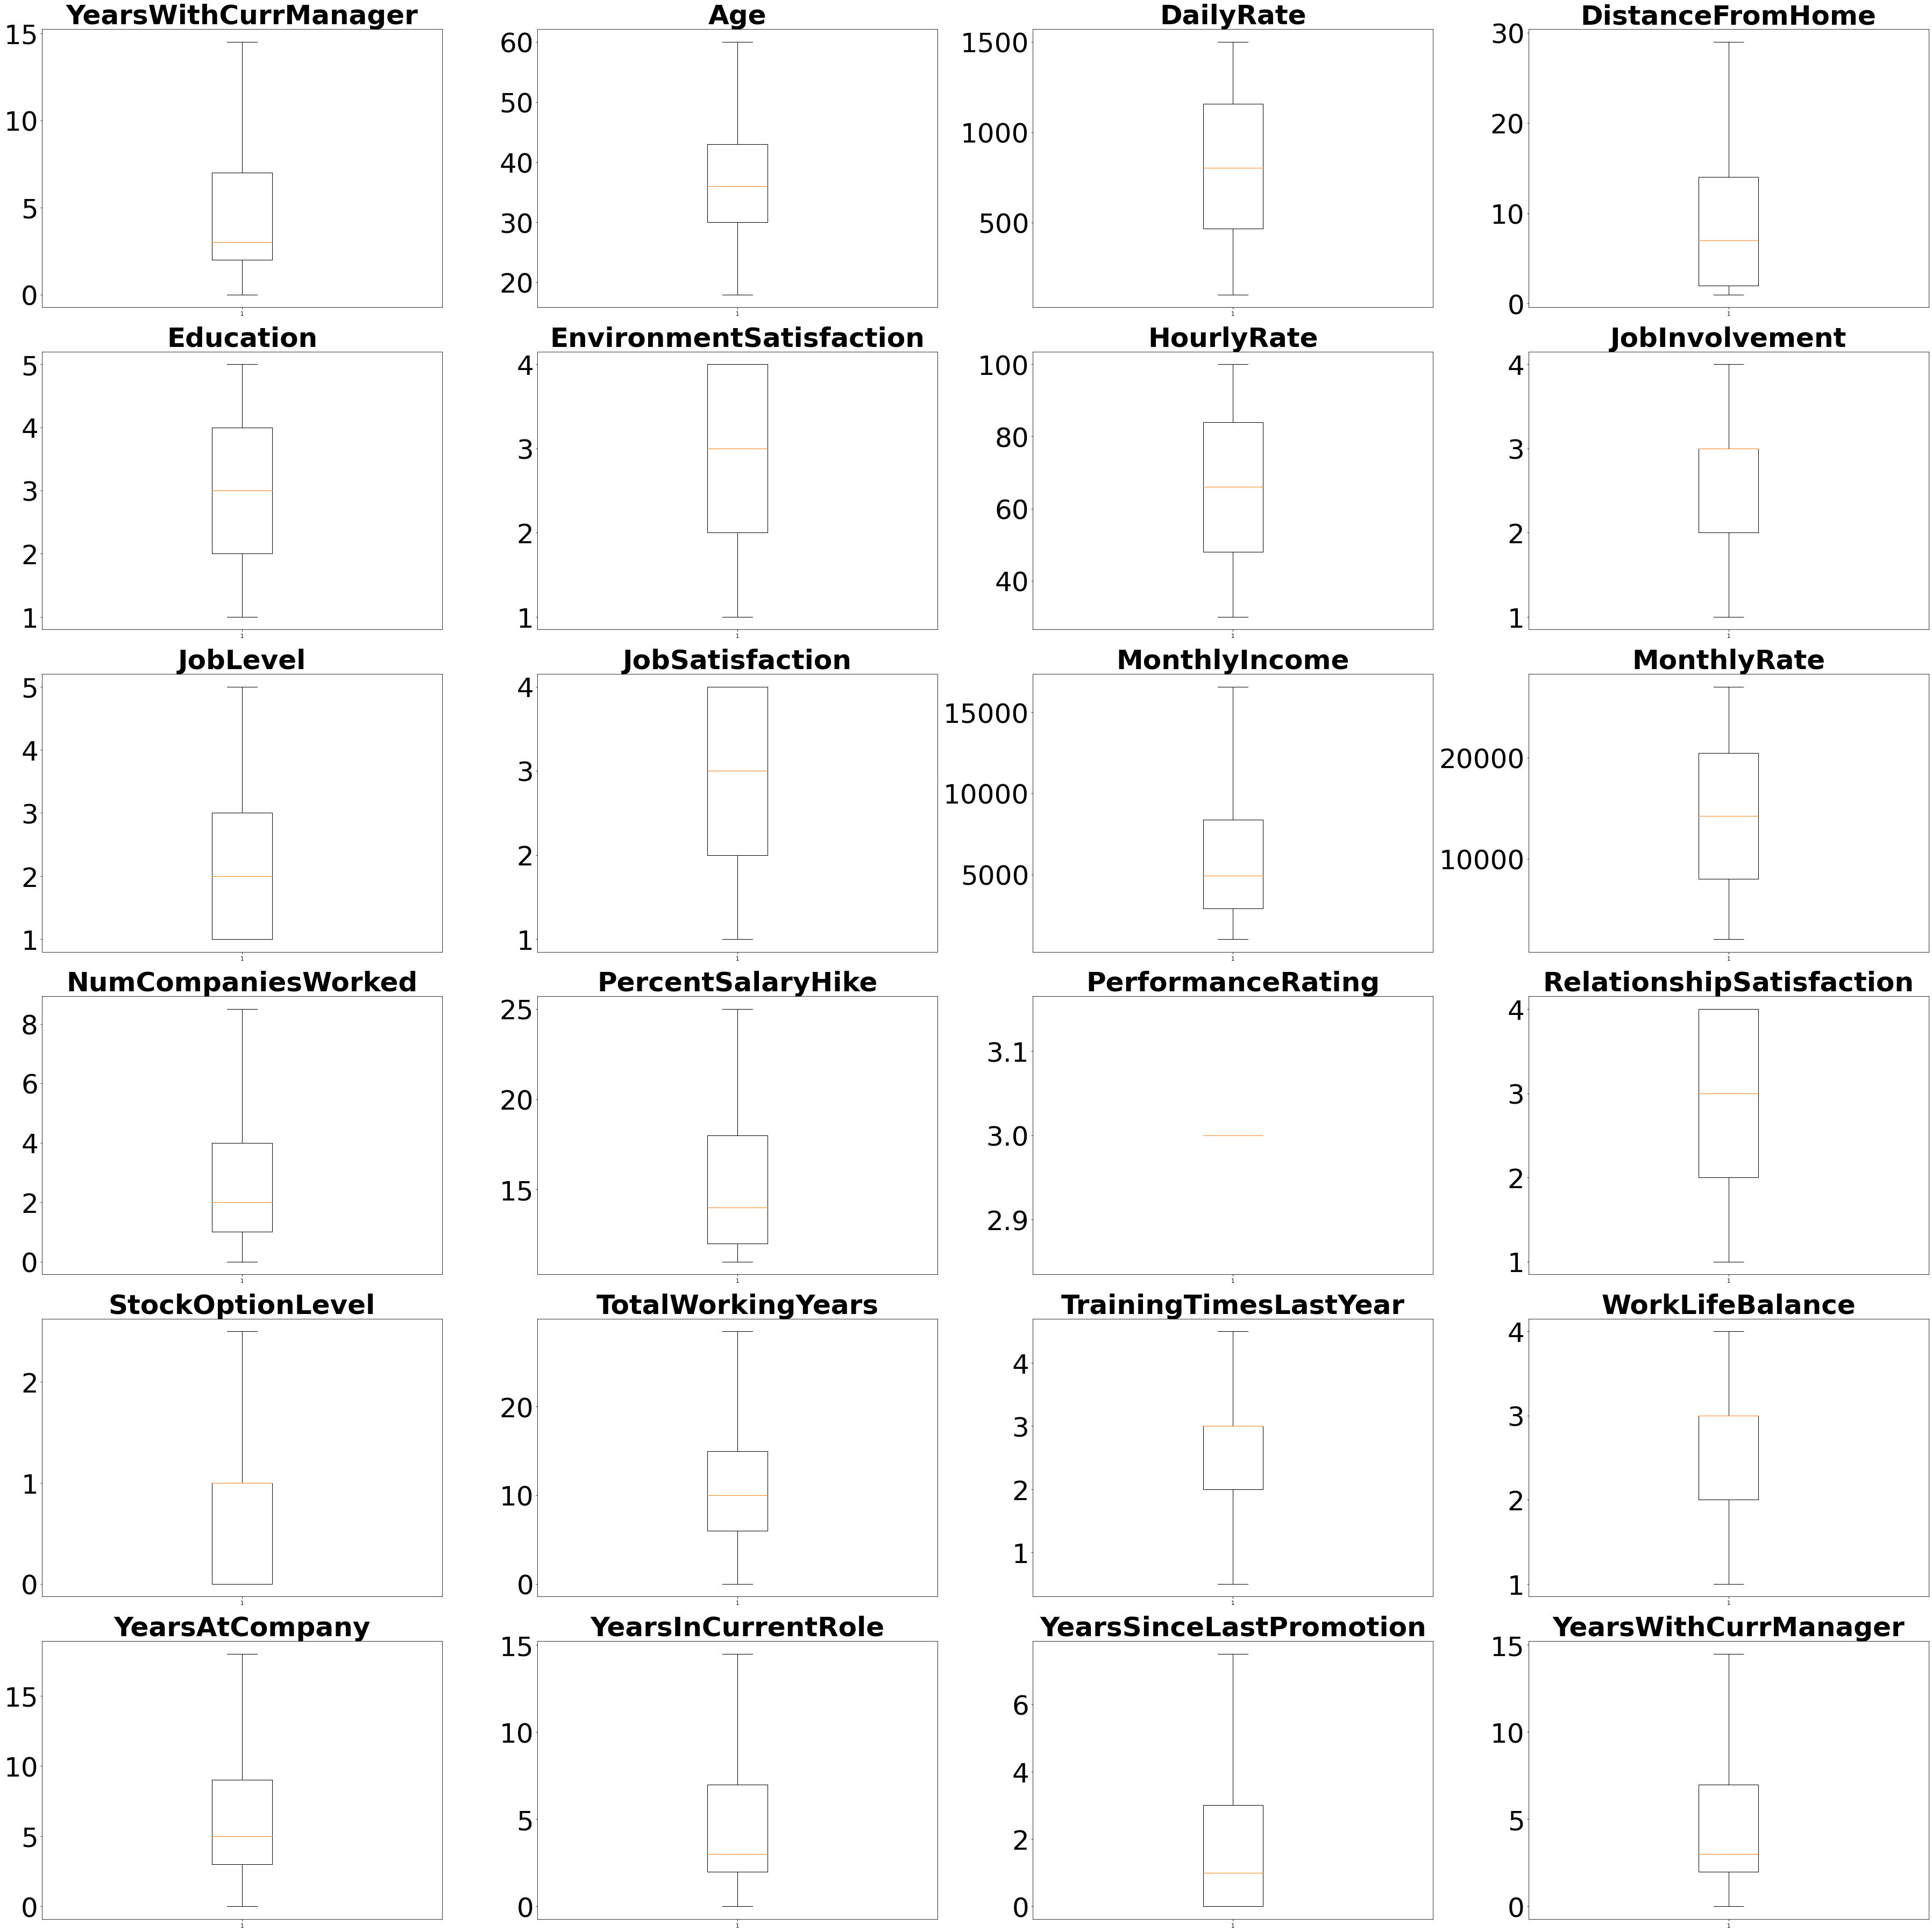

In [25]:
blue_circle = dict(markerfacecolor='blue', marker='o', markeredgecolor='red')

fig, axs = plt.subplots(6, b, figsize=(50,50))

for i, ax in enumerate(axs.flat):
    ax.boxplot(new_em_df.iloc[:,i-1], flierprops=blue_circle)
    ax.set_title(new_em_df.columns[i-1], fontsize=50, fontweight='bold')
    ax.tick_params(axis='y', labelsize=50)
    
plt.tight_layout()
plt.savefig('boxplot_without_outliers')

In [26]:
new_emp_df.nunique()#now performance rating has only one value, wil drop it

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1238
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              1
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             30
TrainingTimesLastYear          6
WorkLifeBalance                4
YearsAtCompany                19
YearsInCurrentRole            16
YearsSinceLastPromotion        9
YearsWithC

In [27]:
hr_emp_df=new_emp_df.drop(columns=['PerformanceRating'],axis=1)

In [28]:
hr_emp_df.shape

(2940, 30)

In [29]:
new_emp_df.shape

(2940, 31)

## Pre-Processing

In [30]:
df=hr_emp_df.copy()

In [31]:
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['OverTime'] = le.fit_transform(df['OverTime'])

In [32]:
df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  41.0          1               2     1102.0           2               1.0   
1  49.0          0               1      279.0           1               8.0   
2  37.0          1               2     1373.0           1               2.0   
3  33.0          0               1     1392.0           1               3.0   
4  27.0          0               2      591.0           1               2.0   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0        2.0               1                      2.0       0  ...   
1        1.0               1                      3.0       1  ...   
2        2.0               4                      4.0       1  ...   
3        4.0               1                      4.0       0  ...   
4        1.0               3                      1.0       1  ...   

   PercentSalaryHike  RelationshipSatisfaction  StockOptionLevel  \
0               11.0                       1.0               0.0   
1               23.0                       4.0               1.0   
2               15.0                       2.0               0.0   
3               11.0                       3.0               0.0   
4               12.0                       4.0               1.0   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                8.0                    0.5              1.0             6.0   
1               10.0                    3.0              3.0            10.0   
2                7.0                    3.0              3.0             0.0   
3                8.0                    3.0              3.0             8.0   
4                6.0                    3.0              3.0             2.0   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                 4.0                      0.0                   5.0  
1                 7.0                      1.0                   7.0  
2                 0.0                      0.0                   0.0  
3                 7.0                      3.0                   0.0  
4                 2.0                      2.0                   2.0  

[5 rows x 30 columns]

## Cor-relation Check

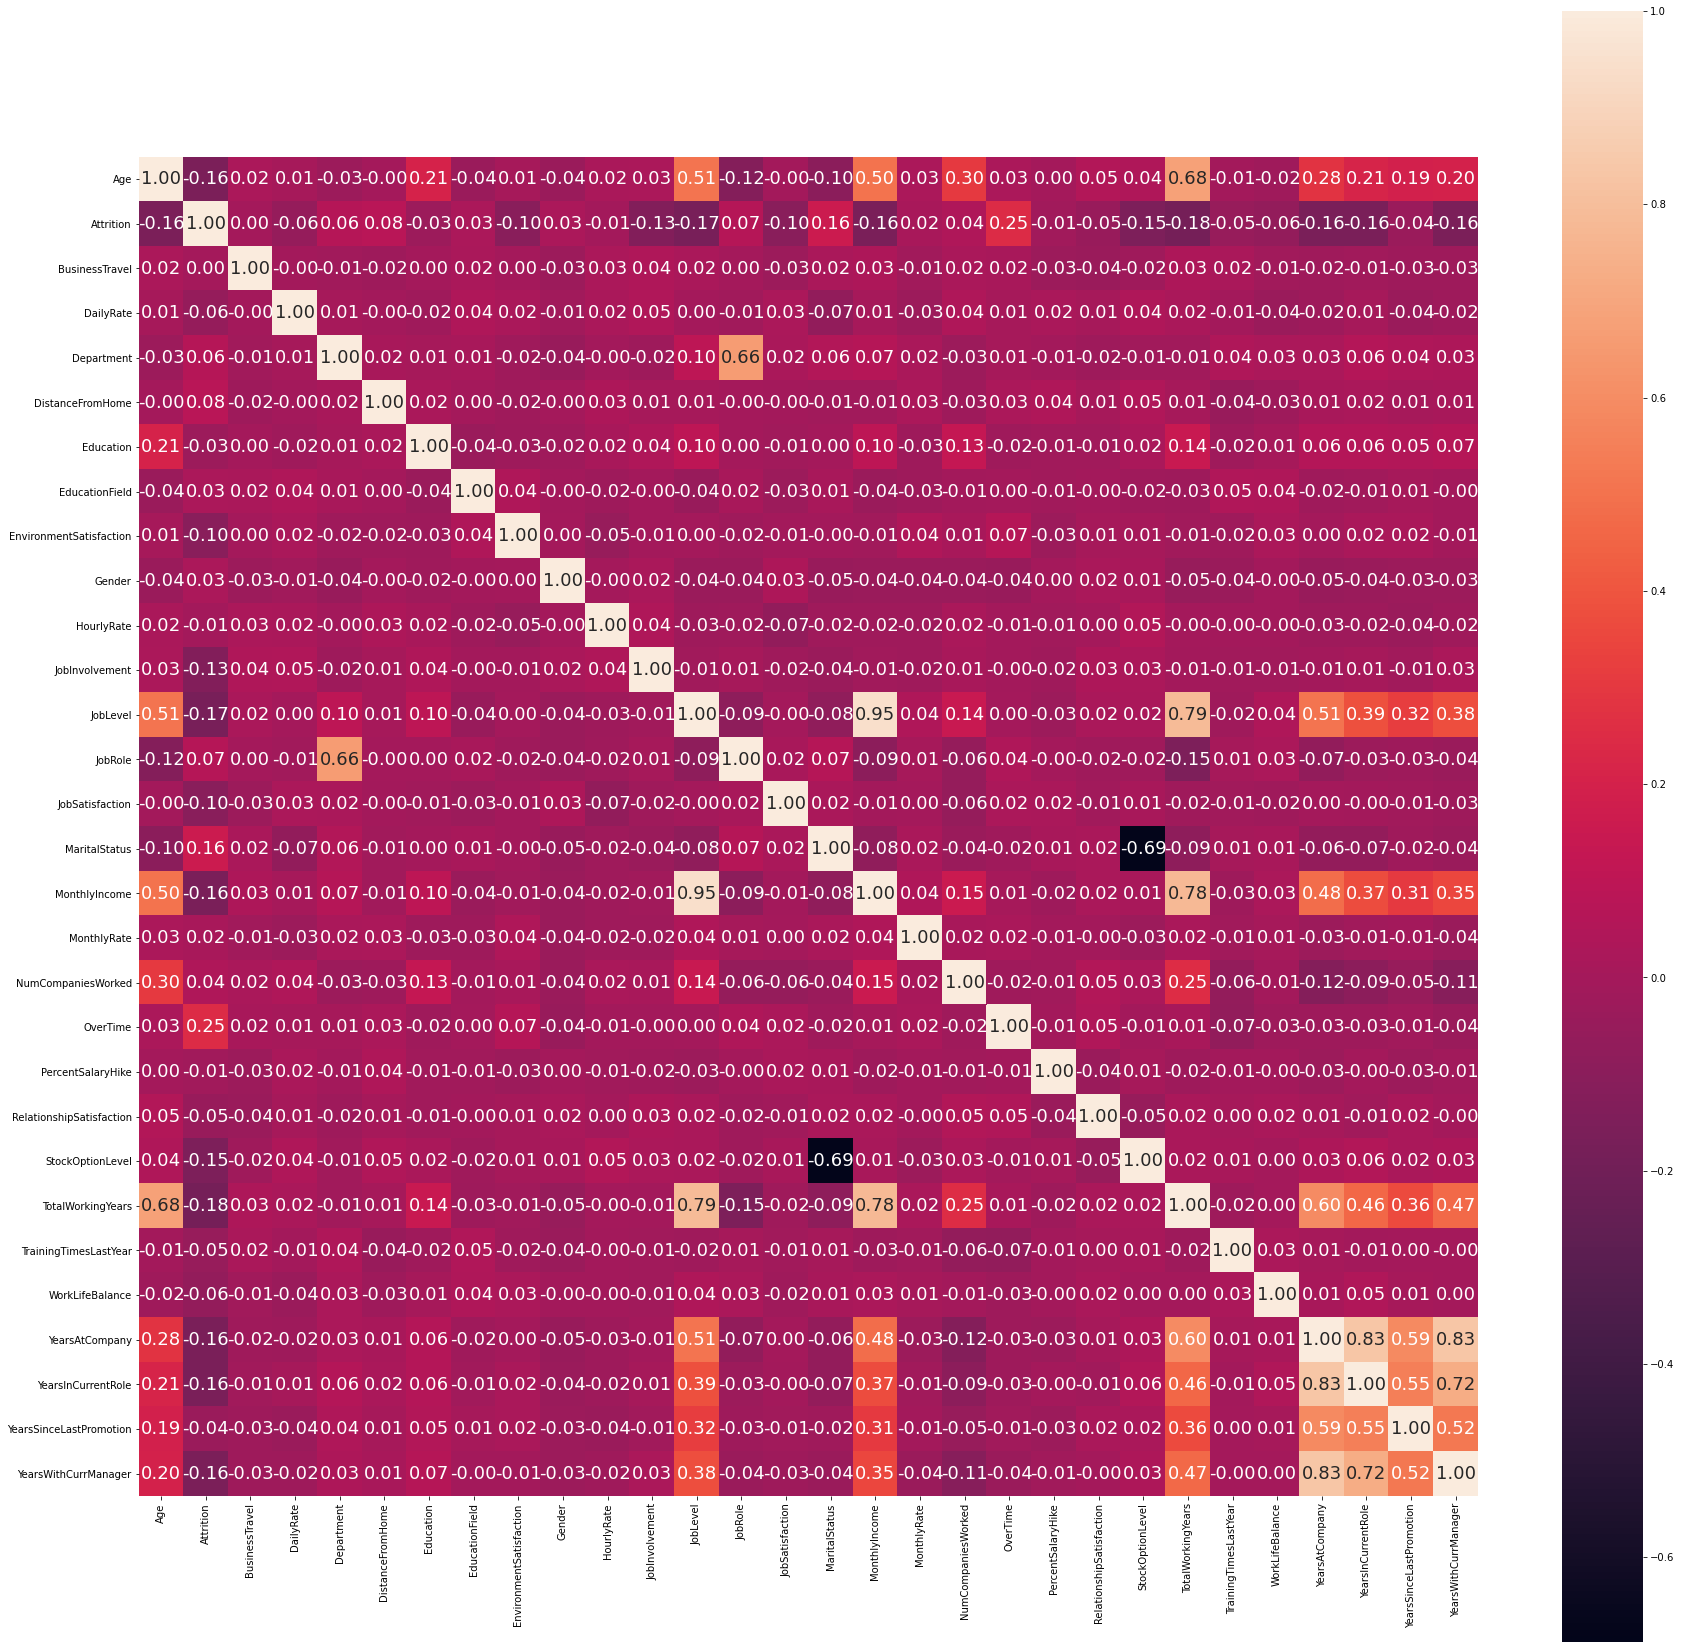

<Figure size 432x288 with 0 Axes>

In [33]:
fig, ax = plt.subplots(1,1, figsize = (30,30))
sns.heatmap(df.corr(),annot=True,square=True,fmt='.2f',annot_kws={"size": 18})
plt.show() #Here JobLevel is 95% correlated with MonthlyIncome, can drop JobLevelColumn
plt.savefig('correlation.jpg')

In [34]:
new_df=df.drop(columns=['JobLevel'],axis=1)

In [35]:
new_df.shape

(2940, 29)

In [36]:
df_2=new_df.copy()

In [37]:
import hvplot.pandas
df_2.drop('Attrition', axis = 1).corrwith(df_2.Attrition).sort_values().hvplot.barh(c = 'g', height = 500)

:Bars   [index]   (0)

## Zero Variance Check

In [38]:
from sklearn.feature_selection import VarianceThreshold
var_threshold = VarianceThreshold(threshold=0)

In [39]:
var_threshold.fit(df_2)

VarianceThreshold(threshold=0)

In [40]:
print(df_2.columns,var_threshold.variances_)#no column has zero variance

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object') [4.20000000e+01 1.35231154e-01 4.42529039e-01 1.39700000e+03
 2.78375214e-01 2.80000000e+01 1.04820029e+00 1.77133787e+00
 1.19401592e+00 2.40000000e-01 7.00000000e+01 5.05974825e-01
 6.05644130e+00 1.21544218e+00 5.32713684e-01 1.55745000e+04
 2.49050000e+04 6.02123698e+00 2.02908048e-01 1.33860317e+01
 1.16821741e+00 6.11595747e-01 2.85000000e+01 1.07661622e+00
 4.98768569e-01 1.8000000

In [41]:
df_2.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  41.0          1               2     1102.0           2               1.0   
1  49.0          0               1      279.0           1               8.0   
2  37.0          1               2     1373.0           1               2.0   
3  33.0          0               1     1392.0           1               3.0   
4  27.0          0               2      591.0           1               2.0   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0        2.0               1                      2.0       0  ...   
1        1.0               1                      3.0       1  ...   
2        2.0               4                      4.0       1  ...   
3        4.0               1                      4.0       0  ...   
4        1.0               3                      1.0       1  ...   

   PercentSalaryHike  RelationshipSatisfaction  StockOptionLevel  \
0               11.0                       1.0               0.0   
1               23.0                       4.0               1.0   
2               15.0                       2.0               0.0   
3               11.0                       3.0               0.0   
4               12.0                       4.0               1.0   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                8.0                    0.5              1.0             6.0   
1               10.0                    3.0              3.0            10.0   
2                7.0                    3.0              3.0             0.0   
3                8.0                    3.0              3.0             8.0   
4                6.0                    3.0              3.0             2.0   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                 4.0                      0.0                   5.0  
1                 7.0                      1.0                   7.0  
2                 0.0                      0.0                   0.0  
3                 7.0                      3.0                   0.0  
4                 2.0                      2.0                   2.0  

[5 rows x 29 columns]

In [42]:
df_2.to_csv('clean_data.csv',index=False)

## Splitting Dependent & Independent Variables

In [44]:
x = df_2.iloc[:, df_2.columns != 'Attrition']
y = df_2.iloc[:, df_2.columns == 'Attrition']

## Splitting Dataset for Training & Testing

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

## Random Forest Classifier

In [46]:
fit_rf = RandomForestClassifier(random_state=42)

## Hyperparameter tuning using GridSearchCV

In [47]:
start = time.time()

param= {'max_depth': [18,19,20,21],
              'min_samples_split':[5,10,15,20],
              'min_samples_leaf':[2,3,4,5],
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion': ['gini']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param, 
                     n_jobs = 1)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search:', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search:',int((end-start)/60),' min.')

Best Parameters using grid search: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5}
Time taken in grid search: 21  min.


In [48]:
#Setting parameters given by GridSearchCV
fit_rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 20,
                  min_samples_split=5,
                 min_samples_leaf=2)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

## Calculating OOB error rate & plotting graph for it

In [57]:
fit_rf.set_params(oob_score=True,warm_start=False)

min_estimators = 15
max_estimators = 2000

error_rate = {}
start_1=time.time()
for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(x_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error
end_1=time.time()
print('Time taken:',int((end_1-start_1)/60),' min.')

Time taken: 265  min.


In [58]:
oob_series = pd.Series(error_rate) # Convering dictionary to series

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

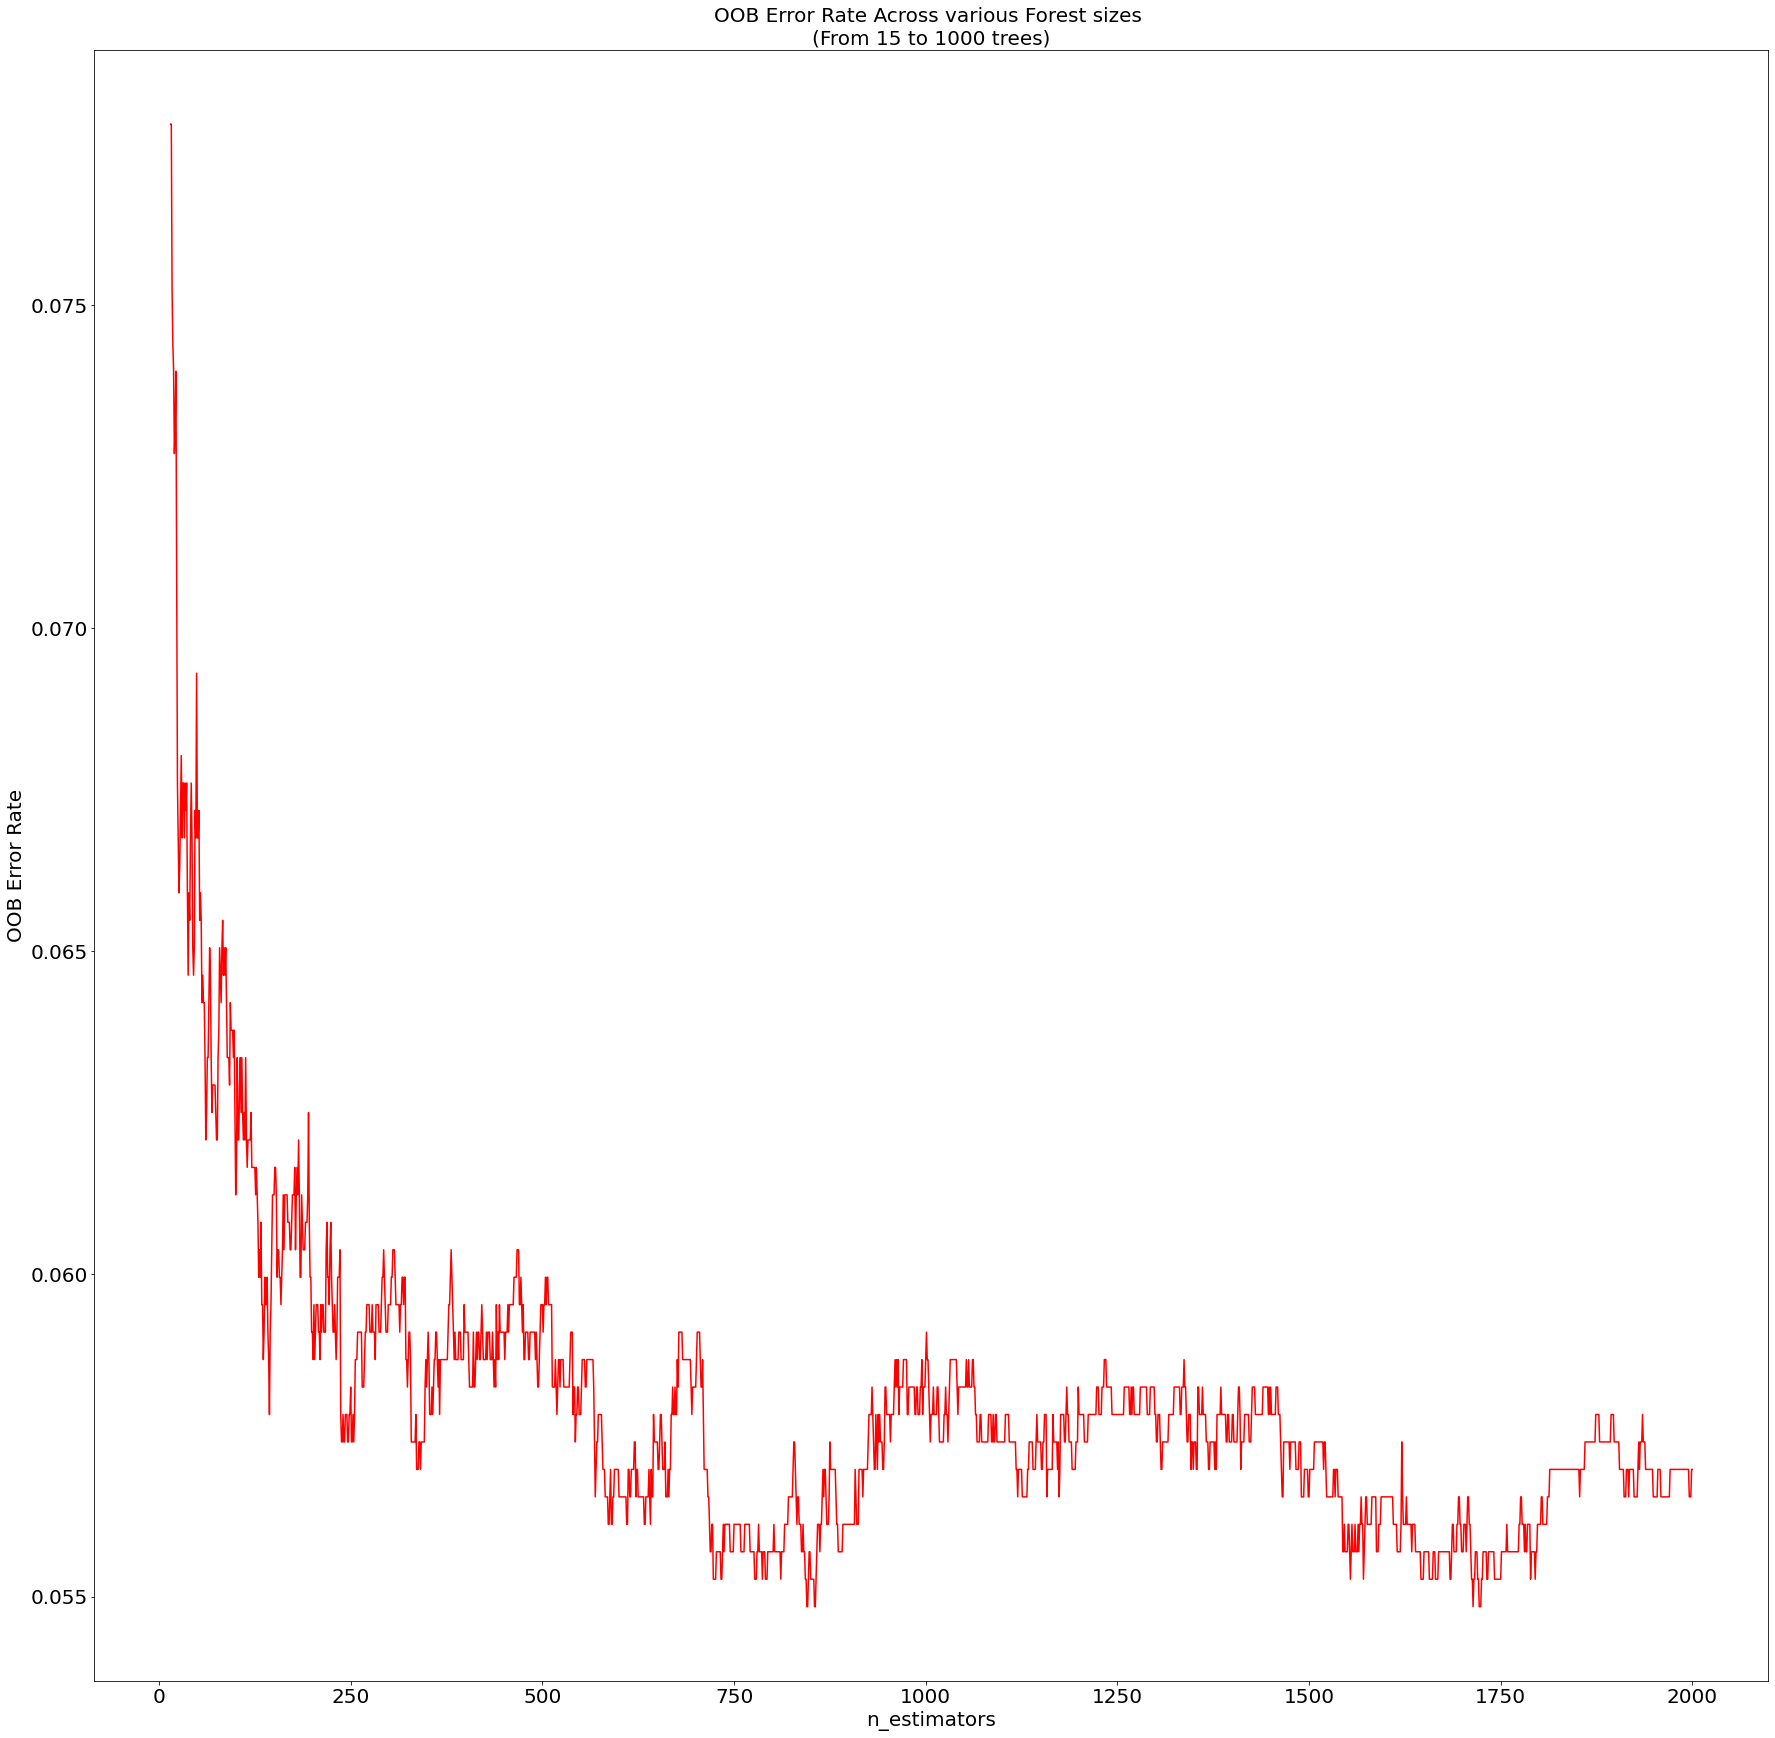

In [59]:
#Plotting OOB error rate
fig, ax = plt.subplots(figsize=(30, 30))
oob_series.plot(kind='line',color = 'red',fontsize=20)
plt.xlabel('n_estimators',fontsize=20)
plt.ylabel('OOB Error Rate',fontsize=20)
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)',fontsize=20)

In [61]:
print('OOB Error rate for 1700 trees is: ',(oob_series[1700]))

OOB Error rate for 1700 trees is:  0.05569727891156462


In [62]:
fit_rf.set_params(n_estimators=1700,
                  bootstrap = True)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1700, oob_score=True, random_state=42)

## Training Random Forest

In [63]:
fit_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1700, oob_score=True, random_state=42)

## Feature Importances

In [64]:
importances=fit_rf.feature_importances_

In [65]:
feature_names = [x.columns[i] for i in range(x.shape[1])]

In [66]:
forest_importances = pd.Series(importances, index=feature_names)

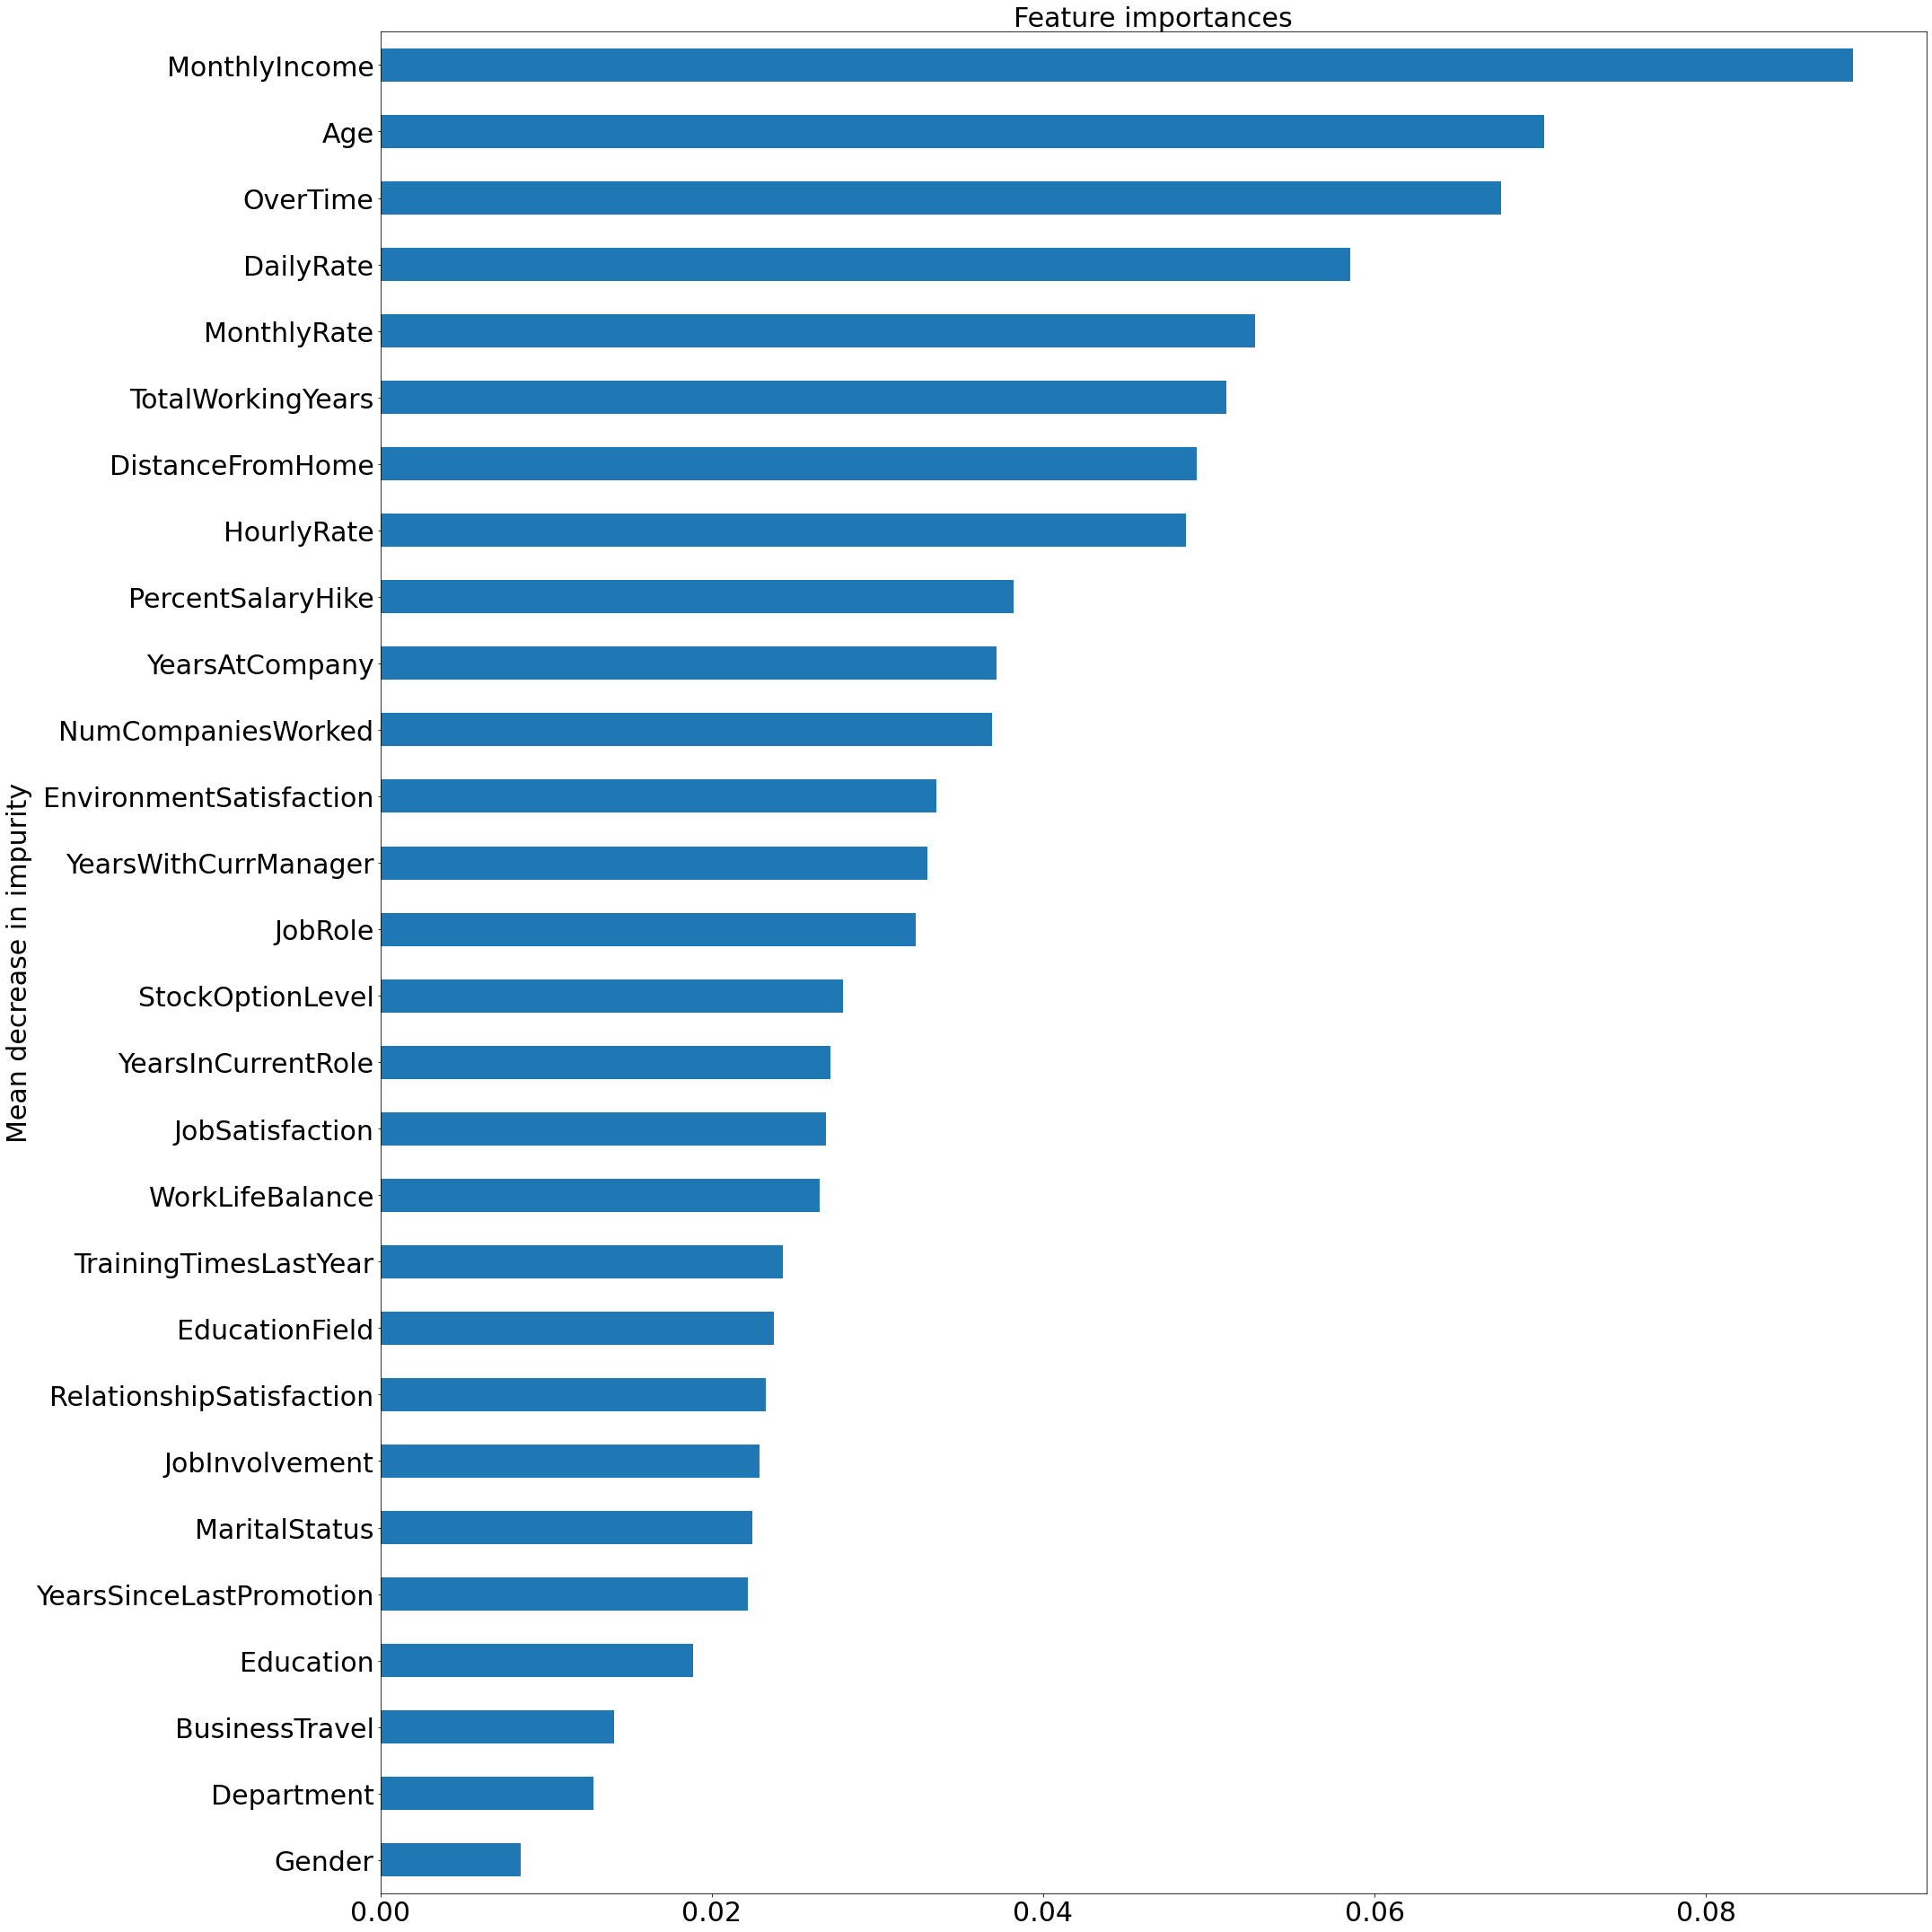

In [67]:
fig, ax = plt.subplots(figsize=(30,30))
forest_importances.sort_values(ascending=True).plot.barh(fontsize=30)
ax.set_title("Feature importances",fontsize=30)
ax.set_ylabel("Mean decrease in impurity",fontsize=30)
fig.tight_layout()

In [68]:
predictions_rf = fit_rf.predict(x_test)

## Confusion Matrix

In [69]:
cm=confusion_matrix(y_test,predictions_rf)

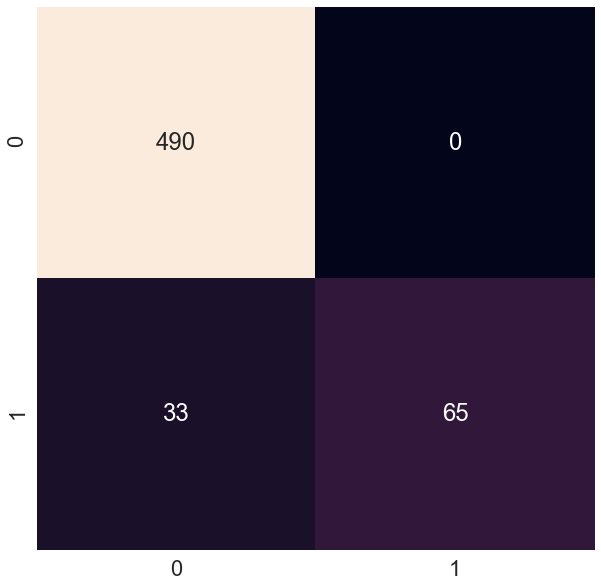

In [79]:
sns.heatmap(cm, annot=True,fmt='d', cbar=False)
sns.set(rc={'figure.figsize':(10,10)},font_scale=1)

## Accuracy

In [71]:
accuracy_rf = fit_rf.score(x_test, y_test)

print("Mean accuracy on the test set is: ",accuracy_rf*100,'%')

Mean accuracy on the test set is:  94.38775510204081 %


## Error Rate

In [72]:
test_error_rate_rf=test_error_rate_rf = 1 - accuracy_rf
print("Test error rate on the test set is: ",test_error_rate_rf*100,'%')

Test error rate on the test set is:  5.612244897959185 %


## Area Under Curve

In [73]:
predictions_prob = fit_rf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test,
                          predictions_prob,
                          pos_label = 1)

In [74]:
auc_rf = auc(fpr, tpr)

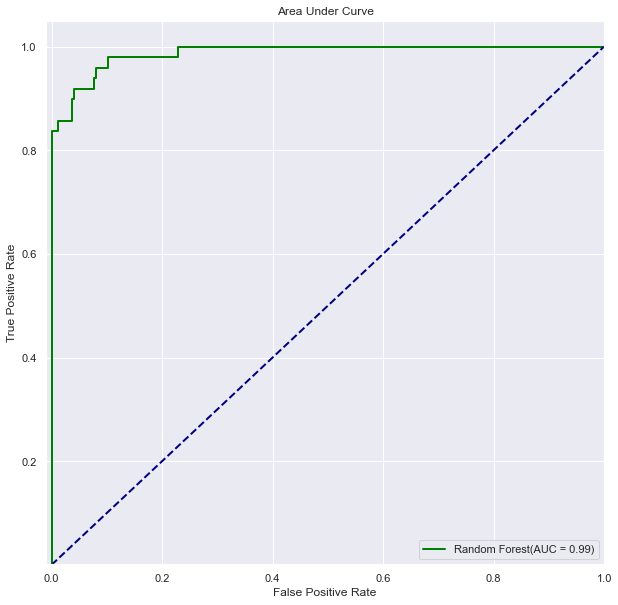

In [75]:
plt.figure(1)
lw = 2
plt.plot(fpr, tpr, color='green',
         lw=lw, label='Random Forest(AUC = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.001, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [77]:
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       490
           1       1.00      0.66      0.80        98

    accuracy                           0.94       588
   macro avg       0.97      0.83      0.88       588
weighted avg       0.95      0.94      0.94       588

